In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Referral_Join_Prediction.csv')
data.head()
data.tail()
data.describe()
data.shape
data.describe().T

,count,mean,std,min,25%,50%,75%,max
referral_id,499.0,250.000000,144.193157,1.00,125.50,250.00,374.50,499.00
referral_age,499.0,27.020040,2.811979,20.00,25.00,27.00,29.00,65.00
referral_exp_in_years,499.0,4.053307,2.609814,1.00,2.00,4.00,6.00,42.00
referral_current_salary,499.0,86.472946,52.566584,25.00,45.00,85.00,126.00,853.00
referral_10_th_marks,498.0,77.295181,11.128083,-1.00,68.00,78.00,87.00,103.00
referral_12th_marks,499.0,77.478958,10.932113,12.00,69.00,77.00,87.00,95.00
referral_graduation_marks,498.0,77.096386,10.812223,-1.00,68.00,77.00,86.00,104.00
referral_post_grad_marks,498.0,78.269076,10.478487,60.00,69.00,78.00,88.75,101.00
referral_expected_sal,497.0,108.692153,58.722281,40.00,62.00,103.00,143.00,870.00
referral_aptitude_verbal_score,489.0,21.840491,12.338425,0.43,11.74,20.87,32.61,43.48


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   referral_id                          499 non-null    int64  
 1   referral_age                         499 non-null    int64  
 2   referral_exp_in_years                499 non-null    float64
 3   referral_preferred_city              499 non-null    object 
 4   referral_current_salary              499 non-null    int64  
 5   referral_10_th_marks                 498 non-null    float64
 6   referral_12th_marks                  499 non-null    int64  
 7   referral_graduation_marks            498 non-null    float64
 8   referral_post_grad_marks             498 non-null    float64
 9   referral_gender                      499 non-null    object 
 10  referral_expected_sal                497 non-null    float64
 11  referral_aptitude_numerical_scor

Numerical Score and Reasoning score seem to have objects in them though they are Numerical Fields. Let's Check 

In [4]:
data['referral_aptitude_numerical_score'].unique()

array(['10.00', '6.09', '41.74', '31.30', '25.65', '38.70', '30.43',
       '5.65', '18.70', '23.04', '27.39', '28.26', '32.61', '40.00',
       '24.78', '0.87', '27.83', '18.26', '20.87', '6.52', '21.74',
       '4.78', '26.96', '39.13', '3.04', '13.48', '33.91', '3.48',
       '15.65', '13.91', '38.26', '3.91', '28.70', '23.48', '10.43',
       '8.26', '39.57', '7.39', '30.87', '5.22', '12.61', '16.96',
       '34.35', '33.04', '10.87', '4.35', '35.65', '16.52', '20.43',
       '36.52', '40.43', '7.83', '6.96', '22.17', '34.78', '33.48',
       '43.48', '0.43', '17.39', '9.13', '29.57', '19.13', '17.83',
       '37.83', '36.09', '23.91', '36.96', '19.57', '31.74', '22.61',
       '12.17', '37.39', '14.78', '30.00', '11.74', '35.22', '2.61',
       '40.87', '42.61', '29.13', '?', '9.57', '43.04', '13.04', '25.22',
       '1.74', '15.22', '11.30', '32.17', '14.35', '20.00', nan, '2.17',
       '26.52', '26.09', '1.30', '8.70', '41.30', '16.09', '42.17',
       '24.35'], dtype=object)

In [5]:
data['referral_aptitude_numerical_score'].replace('?', np.NaN, inplace=True)
data['referral_aptitude_numerical_score'] = data['referral_aptitude_numerical_score'].astype('float64')
#data.info()
data['referral_aptitude_numerical_score'].unique()

array([10.  ,  6.09, 41.74, 31.3 , 25.65, 38.7 , 30.43,  5.65, 18.7 ,
       23.04, 27.39, 28.26, 32.61, 40.  , 24.78,  0.87, 27.83, 18.26,
       20.87,  6.52, 21.74,  4.78, 26.96, 39.13,  3.04, 13.48, 33.91,
        3.48, 15.65, 13.91, 38.26,  3.91, 28.7 , 23.48, 10.43,  8.26,
       39.57,  7.39, 30.87,  5.22, 12.61, 16.96, 34.35, 33.04, 10.87,
        4.35, 35.65, 16.52, 20.43, 36.52, 40.43,  7.83,  6.96, 22.17,
       34.78, 33.48, 43.48,  0.43, 17.39,  9.13, 29.57, 19.13, 17.83,
       37.83, 36.09, 23.91, 36.96, 19.57, 31.74, 22.61, 12.17, 37.39,
       14.78, 30.  , 11.74, 35.22,  2.61, 40.87, 42.61, 29.13,   nan,
        9.57, 43.04, 13.04, 25.22,  1.74, 15.22, 11.3 , 32.17, 14.35,
       20.  ,  2.17, 26.52, 26.09,  1.3 ,  8.7 , 41.3 , 16.09, 42.17,
       24.35])

In [6]:
data['referral_aptitude_reasoning_score'].unique()

array(['?', '20.87', '40.00', '23.48', '16.52', '32.61', '18.26', '2.50',
       '36.52', '3.04', '38.70', '26.52', '22.61', '14.35', '0.87',
       '13.04', '39.13', '34.35', '43.48', '20.43', '25.22', '37.83',
       '3.91', '28.26', '15.22', '15.65', '35.22', '17.39', '24.78',
       '33.04', '42.61', '31.74', '21.74', '6.09', '2.17', '8.70',
       '41.30', '26.09', '23.91', '27.83', '9.57', '10.43', '40.87',
       '12.17', '6.96', '33.48', '12.61', '42.17', '6.52', '2.61',
       '23.04', '20.00', '7.39', '4.35', '25.65', '31.30', '30.43',
       '5.22', '10.00', '37.39', '27.39', '0.23', '26.96', '34.78',
       '13.48', '19.13', '8.26', '24.35', '21.30', '0.67', '0.99',
       '29.57', '78.00', '36.96', '19.57', '36.09', '38.26', '28.70',
       '69.67', '33.91', '10.87', '0.43', '89.00', '18.70', '13.91', nan,
       '32.17', '7.83', '40.43', '16.09', '43.04', '30.00', '39.57',
       '29.13', '41.74', '11.74', '22.17', '16.96', '3.48', '35.65',
       '30.87', '4.78', '1.74',

In [7]:
data['referral_aptitude_reasoning_score'].unique()
data['referral_aptitude_reasoning_score'].replace('?', np.NaN, inplace=True)
data['referral_aptitude_reasoning_score'] = data['referral_aptitude_reasoning_score'].astype('float64')
data['referral_aptitude_reasoning_score'].unique()

array([  nan, 20.87, 40.  , 23.48, 16.52, 32.61, 18.26,  2.5 , 36.52,
        3.04, 38.7 , 26.52, 22.61, 14.35,  0.87, 13.04, 39.13, 34.35,
       43.48, 20.43, 25.22, 37.83,  3.91, 28.26, 15.22, 15.65, 35.22,
       17.39, 24.78, 33.04, 42.61, 31.74, 21.74,  6.09,  2.17,  8.7 ,
       41.3 , 26.09, 23.91, 27.83,  9.57, 10.43, 40.87, 12.17,  6.96,
       33.48, 12.61, 42.17,  6.52,  2.61, 23.04, 20.  ,  7.39,  4.35,
       25.65, 31.3 , 30.43,  5.22, 10.  , 37.39, 27.39,  0.23, 26.96,
       34.78, 13.48, 19.13,  8.26, 24.35, 21.3 ,  0.67,  0.99, 29.57,
       78.  , 36.96, 19.57, 36.09, 38.26, 28.7 , 69.67, 33.91, 10.87,
        0.43, 89.  , 18.7 , 13.91, 32.17,  7.83, 40.43, 16.09, 43.04,
       30.  , 39.57, 29.13, 41.74, 11.74, 22.17, 16.96,  3.48, 35.65,
       30.87,  4.78,  1.74, 11.3 ,  9.13,  1.3 ,  5.65, 14.78])

We have converted those two fields to float. Let's check them

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   referral_id                          499 non-null    int64  
 1   referral_age                         499 non-null    int64  
 2   referral_exp_in_years                499 non-null    float64
 3   referral_preferred_city              499 non-null    object 
 4   referral_current_salary              499 non-null    int64  
 5   referral_10_th_marks                 498 non-null    float64
 6   referral_12th_marks                  499 non-null    int64  
 7   referral_graduation_marks            498 non-null    float64
 8   referral_post_grad_marks             498 non-null    float64
 9   referral_gender                      499 non-null    object 
 10  referral_expected_sal                497 non-null    float64
 11  referral_aptitude_numerical_scor

Let's see if any of ID'S have 10th marks less than 35

In [9]:
data[data['referral_10_th_marks'] < 35]

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
89,90,27,4.0,Bangalore,85,-1.0,81,93.0,86.0,Female,103.0,31.74,6.52,30.43,10.0,3,101,EL0,Yes


10th marks seem to be entered wrong. Let's change it to mean of 10th marks

In [10]:
data['referral_10_th_marks'].replace(-1.0,data['referral_10_th_marks'].mean(),inplace=True)
data['referral_10_th_marks'].describe()
data.iloc[89]

referral_id                                   90
referral_age                                  27
referral_exp_in_years                        4.0
referral_preferred_city                Bangalore
referral_current_salary                       85
referral_10_th_marks                   77.295181
referral_12th_marks                           81
referral_graduation_marks                   93.0
referral_post_grad_marks                    86.0
referral_gender                           Female
referral_expected_sal                      103.0
referral_aptitude_numerical_score          31.74
referral_aptitude_verbal_score              6.52
referral_aptitude_reasoning_score          30.43
referral_Management_Interview_score         10.0
referral_HR_Interview_score                    3
Salary offered                               101
Emp_Salary_Grade                             EL0
Joined                                       Yes
Name: 89, dtype: object

Similarly let's do for Graduation marks

In [11]:
data[data["referral_graduation_marks"] < 35]

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
270,271,29,6.0,Bangalore,126,82.0,88,-1.0,64.0,Male,143.0,10.43,27.39,27.83,1.0,6,141,ML0,No


Let's rectify this too (Another way)

In [12]:
data['referral_graduation_marks'] = np.where(data['referral_graduation_marks'] == -1.0, data['referral_10_th_marks'], data['referral_graduation_marks'])
data.iloc[270]

referral_id                                  271
referral_age                                  29
referral_exp_in_years                        6.0
referral_preferred_city                Bangalore
referral_current_salary                      126
referral_10_th_marks                        82.0
referral_12th_marks                           88
referral_graduation_marks                   82.0
referral_post_grad_marks                    64.0
referral_gender                             Male
referral_expected_sal                      143.0
referral_aptitude_numerical_score          10.43
referral_aptitude_verbal_score             27.39
referral_aptitude_reasoning_score          27.83
referral_Management_Interview_score          1.0
referral_HR_Interview_score                    6
Salary offered                               141
Emp_Salary_Grade                             ML0
Joined                                        No
Name: 270, dtype: object

Check whether Categorical Fields are fine or not

In [13]:
data['referral_preferred_city'].value_counts()
#data['referral_preferred_city'].unique()

referral_preferred_city
Mumbai       232
Bangalore    142
Delhi         93
Pune          32
Name: count, dtype: int64

In [14]:
data["Joined"].value_counts()

Joined
No     261
Yes    238
Name: count, dtype: int64

In [15]:
data["Emp_Salary_Grade"].value_counts()

Emp_Salary_Grade
EL0    221
ML0    187
EE0     91
Name: count, dtype: int64

In [16]:
data['referral_gender'].value_counts()
data[data['referral_gender'] == '?']

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
245,246,27,4.0,Mumbai,85,83.0,91,73.0,74.0,?,103.0,21.74,23.91,11.74,4.0,3,101,ML0,No


In [17]:
data['referral_gender'].replace('?','Male',inplace=True)     # Replacing with Mode which is Male
data.iloc[245]

referral_id                               246
referral_age                               27
referral_exp_in_years                     4.0
referral_preferred_city                Mumbai
referral_current_salary                    85
referral_10_th_marks                     83.0
referral_12th_marks                        91
referral_graduation_marks                73.0
referral_post_grad_marks                 74.0
referral_gender                          Male
referral_expected_sal                   103.0
referral_aptitude_numerical_score       21.74
referral_aptitude_verbal_score          23.91
referral_aptitude_reasoning_score       11.74
referral_Management_Interview_score       4.0
referral_HR_Interview_score                 3
Salary offered                            101
Emp_Salary_Grade                          ML0
Joined                                     No
Name: 245, dtype: object

Missing Values : Let's check for null data entries

In [18]:
data.isnull().sum()

referral_id                             0
referral_age                            0
referral_exp_in_years                   0
referral_preferred_city                 0
referral_current_salary                 0
referral_10_th_marks                    1
referral_12th_marks                     0
referral_graduation_marks               1
referral_post_grad_marks                1
referral_gender                         0
referral_expected_sal                   2
referral_aptitude_numerical_score       4
referral_aptitude_verbal_score         10
referral_aptitude_reasoning_score       8
referral_Management_Interview_score     1
referral_HR_Interview_score             0
Salary offered                          0
Emp_Salary_Grade                        0
Joined                                  0
dtype: int64

In [19]:
data[data['referral_aptitude_verbal_score'].isnull()]

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
10,11,22,1.0,Pune,26,75.0,75,62.0,74.0,Male,50.0,27.39,NaN,38.70,9.0,7,45,ML0,Yes
62,63,30,7.0,Delhi,146,72.0,78,80.0,79.0,Female,163.0,22.17,NaN,31.74,5.0,8,161,ML0,No
162,163,28,5.0,Mumbai,106,93.0,77,93.0,75.0,Female,123.0,0.87,NaN,28.26,5.0,7,121,EE0,No
238,239,24,1.0,Bangalore,25,72.0,64,81.0,64.0,Female,50.0,NaN,NaN,20.43,8.0,1,40,EL0,Yes
272,273,24,1.0,Bangalore,25,64.0,68,64.0,93.0,Female,42.0,33.04,NaN,6.96,5.0,3,40,ML0,No
297,298,25,2.0,Mumbai,45,89.0,88,69.0,83.0,Female,62.0,16.96,NaN,NaN,5.0,8,60,EL0,No
405,406,26,3.0,Mumbai,65,93.0,62,66.0,89.0,Female,83.0,20.43,NaN,33.91,9.0,8,80,ML0,Yes
409,410,25,2.0,Mumbai,45,69.0,76,69.0,61.0,Male,62.0,30.87,NaN,32.17,4.0,5,60,EL0,No
441,442,24,1.0,Mumbai,25,83.0,75,88.0,61.0,Female,42.0,5.65,NaN,9.13,9.0,1,40,ML0,Yes
476,477,29,6.0,Mumbai,96,92.0,74,76.0,75.0,Male,113.0,6.09,NaN,5.65,1.0,5,111,EL0,No


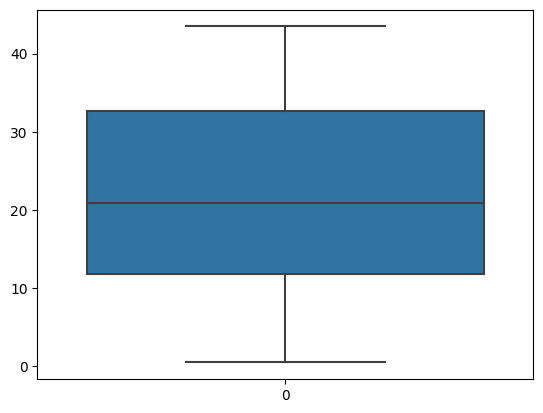

In [20]:
sns.boxplot(data['referral_aptitude_verbal_score'])
plt.show()

I have checked if there are any outliers before filling null values with mean. Do check this

In [21]:
data['referral_aptitude_verbal_score'].fillna(data['referral_aptitude_verbal_score'].mean(), inplace = True)
data.isnull().sum()

referral_id                            0
referral_age                           0
referral_exp_in_years                  0
referral_preferred_city                0
referral_current_salary                0
referral_10_th_marks                   1
referral_12th_marks                    0
referral_graduation_marks              1
referral_post_grad_marks               1
referral_gender                        0
referral_expected_sal                  2
referral_aptitude_numerical_score      4
referral_aptitude_verbal_score         0
referral_aptitude_reasoning_score      8
referral_Management_Interview_score    1
referral_HR_Interview_score            0
Salary offered                         0
Emp_Salary_Grade                       0
Joined                                 0
dtype: int64

We can fill null data in 1 step to all data. Let's fill the remaining fields with their respective Median's

In [22]:
data_num = data.select_dtypes(['int64','float64'])
data_cat = data.select_dtypes(['object'])
data_num

,referral_id,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
0,1,28,5.0,106,89.0,72,87.0,83.0,123.0,10.00,33.04,NaN,10.0,3,141
1,2,26,3.0,65,63.0,77,94.0,85.0,83.0,6.09,27.39,20.87,10.0,10,80
2,3,23,2.0,45,92.0,85,84.0,72.0,62.0,41.74,2.61,40.00,2.0,1,60
3,4,29,6.0,126,60.0,95,95.0,67.0,146.0,31.30,9.13,23.48,9.0,3,142
4,5,26,3.0,65,92.0,70,80.0,92.0,83.0,25.65,30.43,16.52,7.0,4,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,21,1.0,25,81.0,77,77.0,91.0,42.0,19.13,16.09,6.52,9.0,8,40
495,496,21,1.0,25,74.0,95,67.0,81.0,100.0,3.48,13.04,29.13,9.0,3,40
496,497,29,7.0,146,94.0,92,89.0,71.0,200.0,38.70,5.22,39.57,9.0,5,161
497,498,30,7.0,143,64.0,89,61.0,88.0,160.0,38.70,37.83,6.52,7.0,5,158


In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

data_num = pd.DataFrame(imputer.fit_transform(data_num), columns = data_num.columns)
data_num.isnull().sum()
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
referral_id,499.0,250.000000,144.193157,1.00,125.50,250.00,374.500,499.00
referral_age,499.0,27.020040,2.811979,20.00,25.00,27.00,29.000,65.00
referral_exp_in_years,499.0,4.053307,2.609814,1.00,2.00,4.00,6.000,42.00
referral_current_salary,499.0,86.472946,52.566584,25.00,45.00,85.00,126.000,853.00
referral_10_th_marks,499.0,77.453497,10.547603,60.00,68.00,78.00,87.000,103.00
referral_12th_marks,499.0,77.478958,10.932113,12.00,69.00,77.00,87.000,95.00
referral_graduation_marks,499.0,77.262525,10.219735,60.00,68.00,77.00,86.000,104.00
referral_post_grad_marks,499.0,78.268537,10.467968,60.00,69.00,78.00,88.500,101.00
referral_expected_sal,499.0,108.669339,58.605352,40.00,62.00,103.00,143.000,870.00
referral_aptitude_numerical_score,499.0,20.971363,12.507253,0.43,10.00,20.43,31.955,43.48


In [24]:
data_new = pd.concat([data_num, data_cat], axis=1, join='inner')
data_new.head()
data_new.shape
data_new.to_excel('Clean_Referral.xlsx',index=False)

Data Visualization

Univariate Analysis

In [25]:
data[['referral_exp_in_years','referral_current_salary']].describe()

,referral_exp_in_years,referral_current_salary
count,499.000000,499.000000
mean,4.053307,86.472946
std,2.609814,52.566584
min,1.000000,25.000000
25%,2.000000,45.000000
50%,4.000000,85.000000
75%,6.000000,126.000000
max,42.000000,853.000000


[362 136   0   0   0   0   0   0   0   1] [ 1.   5.1  9.2 13.3 17.4 21.5 25.6 29.7 33.8 37.9 42. ]


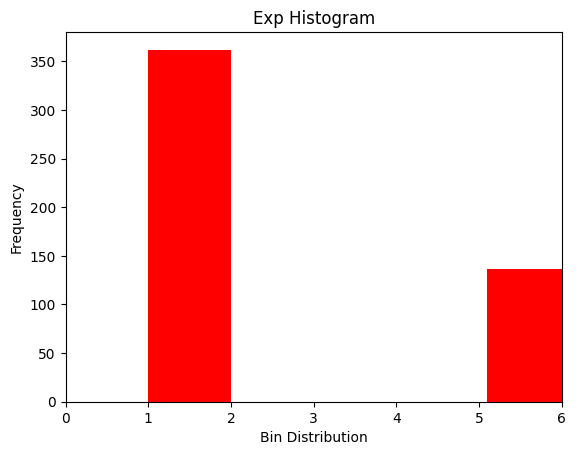

In [26]:
plt.hist(data['referral_exp_in_years'],color='r',width=1.0,histtype='barstacked')
c,b = np.histogram(data['referral_exp_in_years'])
print(c,b)
plt.xlim(0,6)
plt.xlabel('Bin Distribution')                                  # Not working good. Instead use sns.hist()
plt.ylabel('Frequency')
plt.title('Exp Histogram')
plt.show()

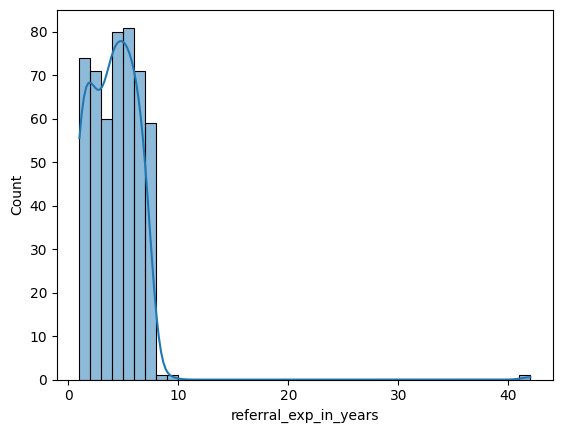

In [27]:
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,8))
sns.histplot(data['referral_exp_in_years'], kde=True)
plt.show()

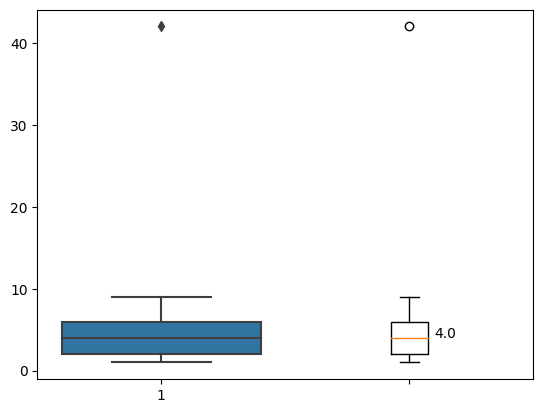

In [28]:
sns.boxplot(data['referral_exp_in_years'])
plt.boxplot(data['referral_exp_in_years'])
plt.text(x = 1.1,y = data['referral_exp_in_years'].median(), s = data['referral_exp_in_years'].median())
plt.show()

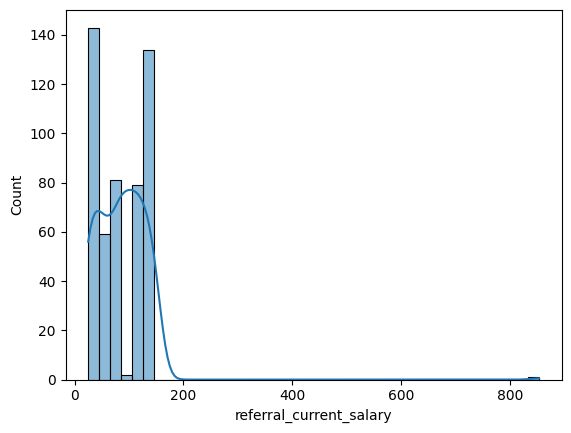

In [29]:
sns.histplot(data['referral_current_salary'], kde=True)
plt.show()

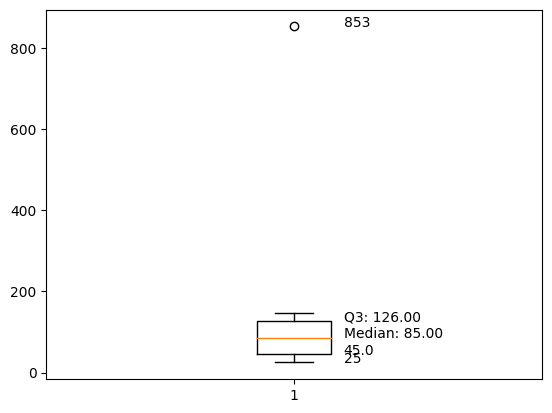

In [30]:
plt.boxplot(data['referral_current_salary'])
plt.text(x=1.1,y=data['referral_current_salary'].min(),s= data['referral_current_salary'].min())
plt.text(x=1.1,y=data['referral_current_salary'].max(),s= data['referral_current_salary'].max())
plt.text(x=1.1,y=data['referral_current_salary'].median(),s= f"Median: {data['referral_current_salary'].median():.2f}")
plt.text(x=1.1,y=data['referral_current_salary'].quantile(0.75),s= f"Q3: {data['referral_current_salary'].quantile(0.75):.2f}")    # Good example of using f string and rounding off
plt.text(x=1.1,y=data['referral_current_salary'].quantile(0.25),s= data['referral_current_salary'].quantile(0.25))

plt.show()

For Categorical Fields, simple Count Plot

In [31]:
data['referral_preferred_city'].value_counts(normalize=True)

referral_preferred_city
Mumbai       0.464930
Bangalore    0.284569
Delhi        0.186373
Pune         0.064128
Name: proportion, dtype: float64

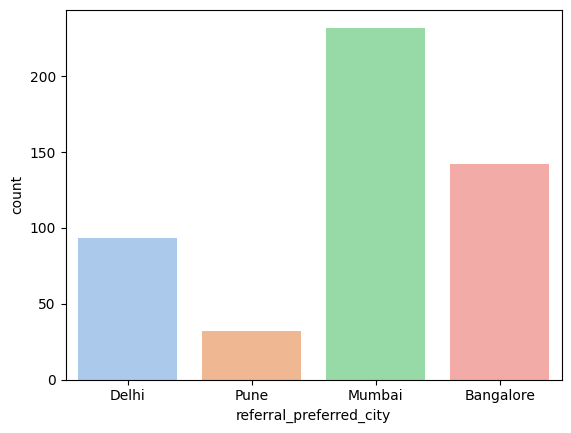

In [32]:
sns.countplot(x = data['referral_preferred_city'], palette='pastel')
plt.show()

Bivariate Analysis

Numeric vs Numeric -- Scatterplot

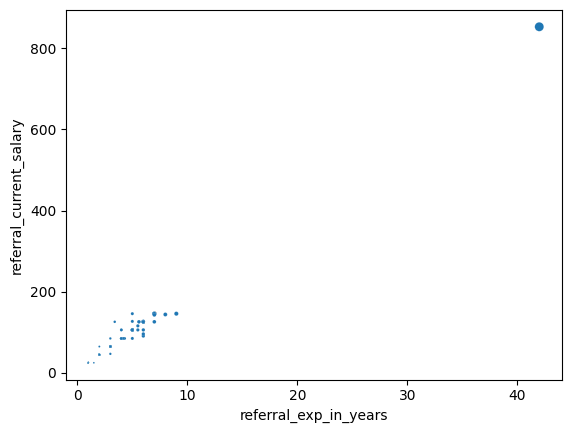

In [33]:
sns.scatterplot(x=data['referral_exp_in_years'],y=data['referral_current_salary'],data=data,s=np.array(data['referral_exp_in_years']))
plt.show()

In [34]:
data[data['referral_exp_in_years'] > 40]

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
354,355,65,42.0,Mumbai,853,61.0,95,78.0,68.0,Male,870.0,2.17,33.48,29.13,7.0,3,868,EL0,No


Categorical vs Categorical --Count Plot with 'hue'

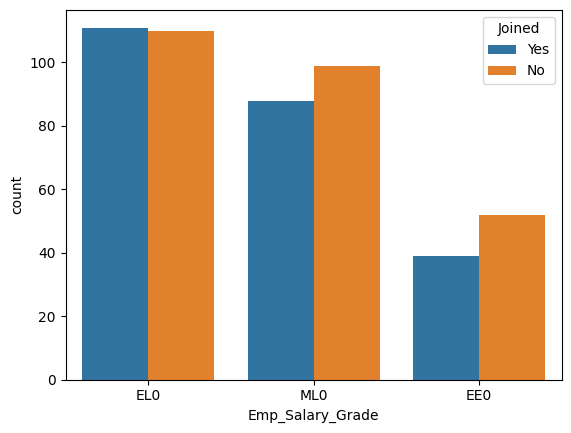

In [35]:
sns.countplot(x=data['Emp_Salary_Grade'],hue='Joined',data=data)
plt.show()

In [36]:
pd.crosstab(data['Emp_Salary_Grade'],data['Joined'],normalize=True)

Joined,No,Yes
Emp_Salary_Grade,,
EE0,0.104208,0.078156
EL0,0.220441,0.222445
ML0,0.198397,0.176353


Categorical vs Numerical -- Boxplot with Category on x-axis (plt.boxplot() doesn't work in this case mind it)

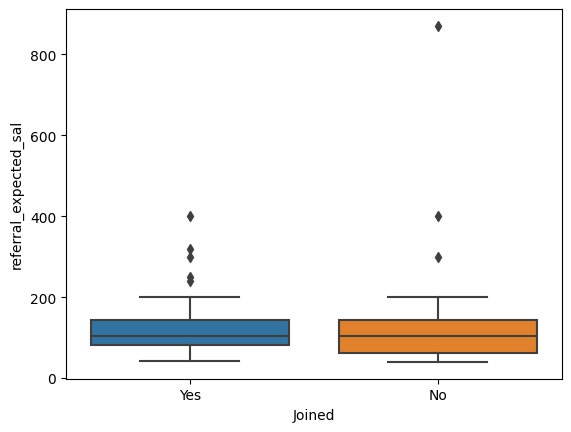

In [37]:
sns.boxplot(x=data['Joined'],y=data['referral_expected_sal'])
plt.show()

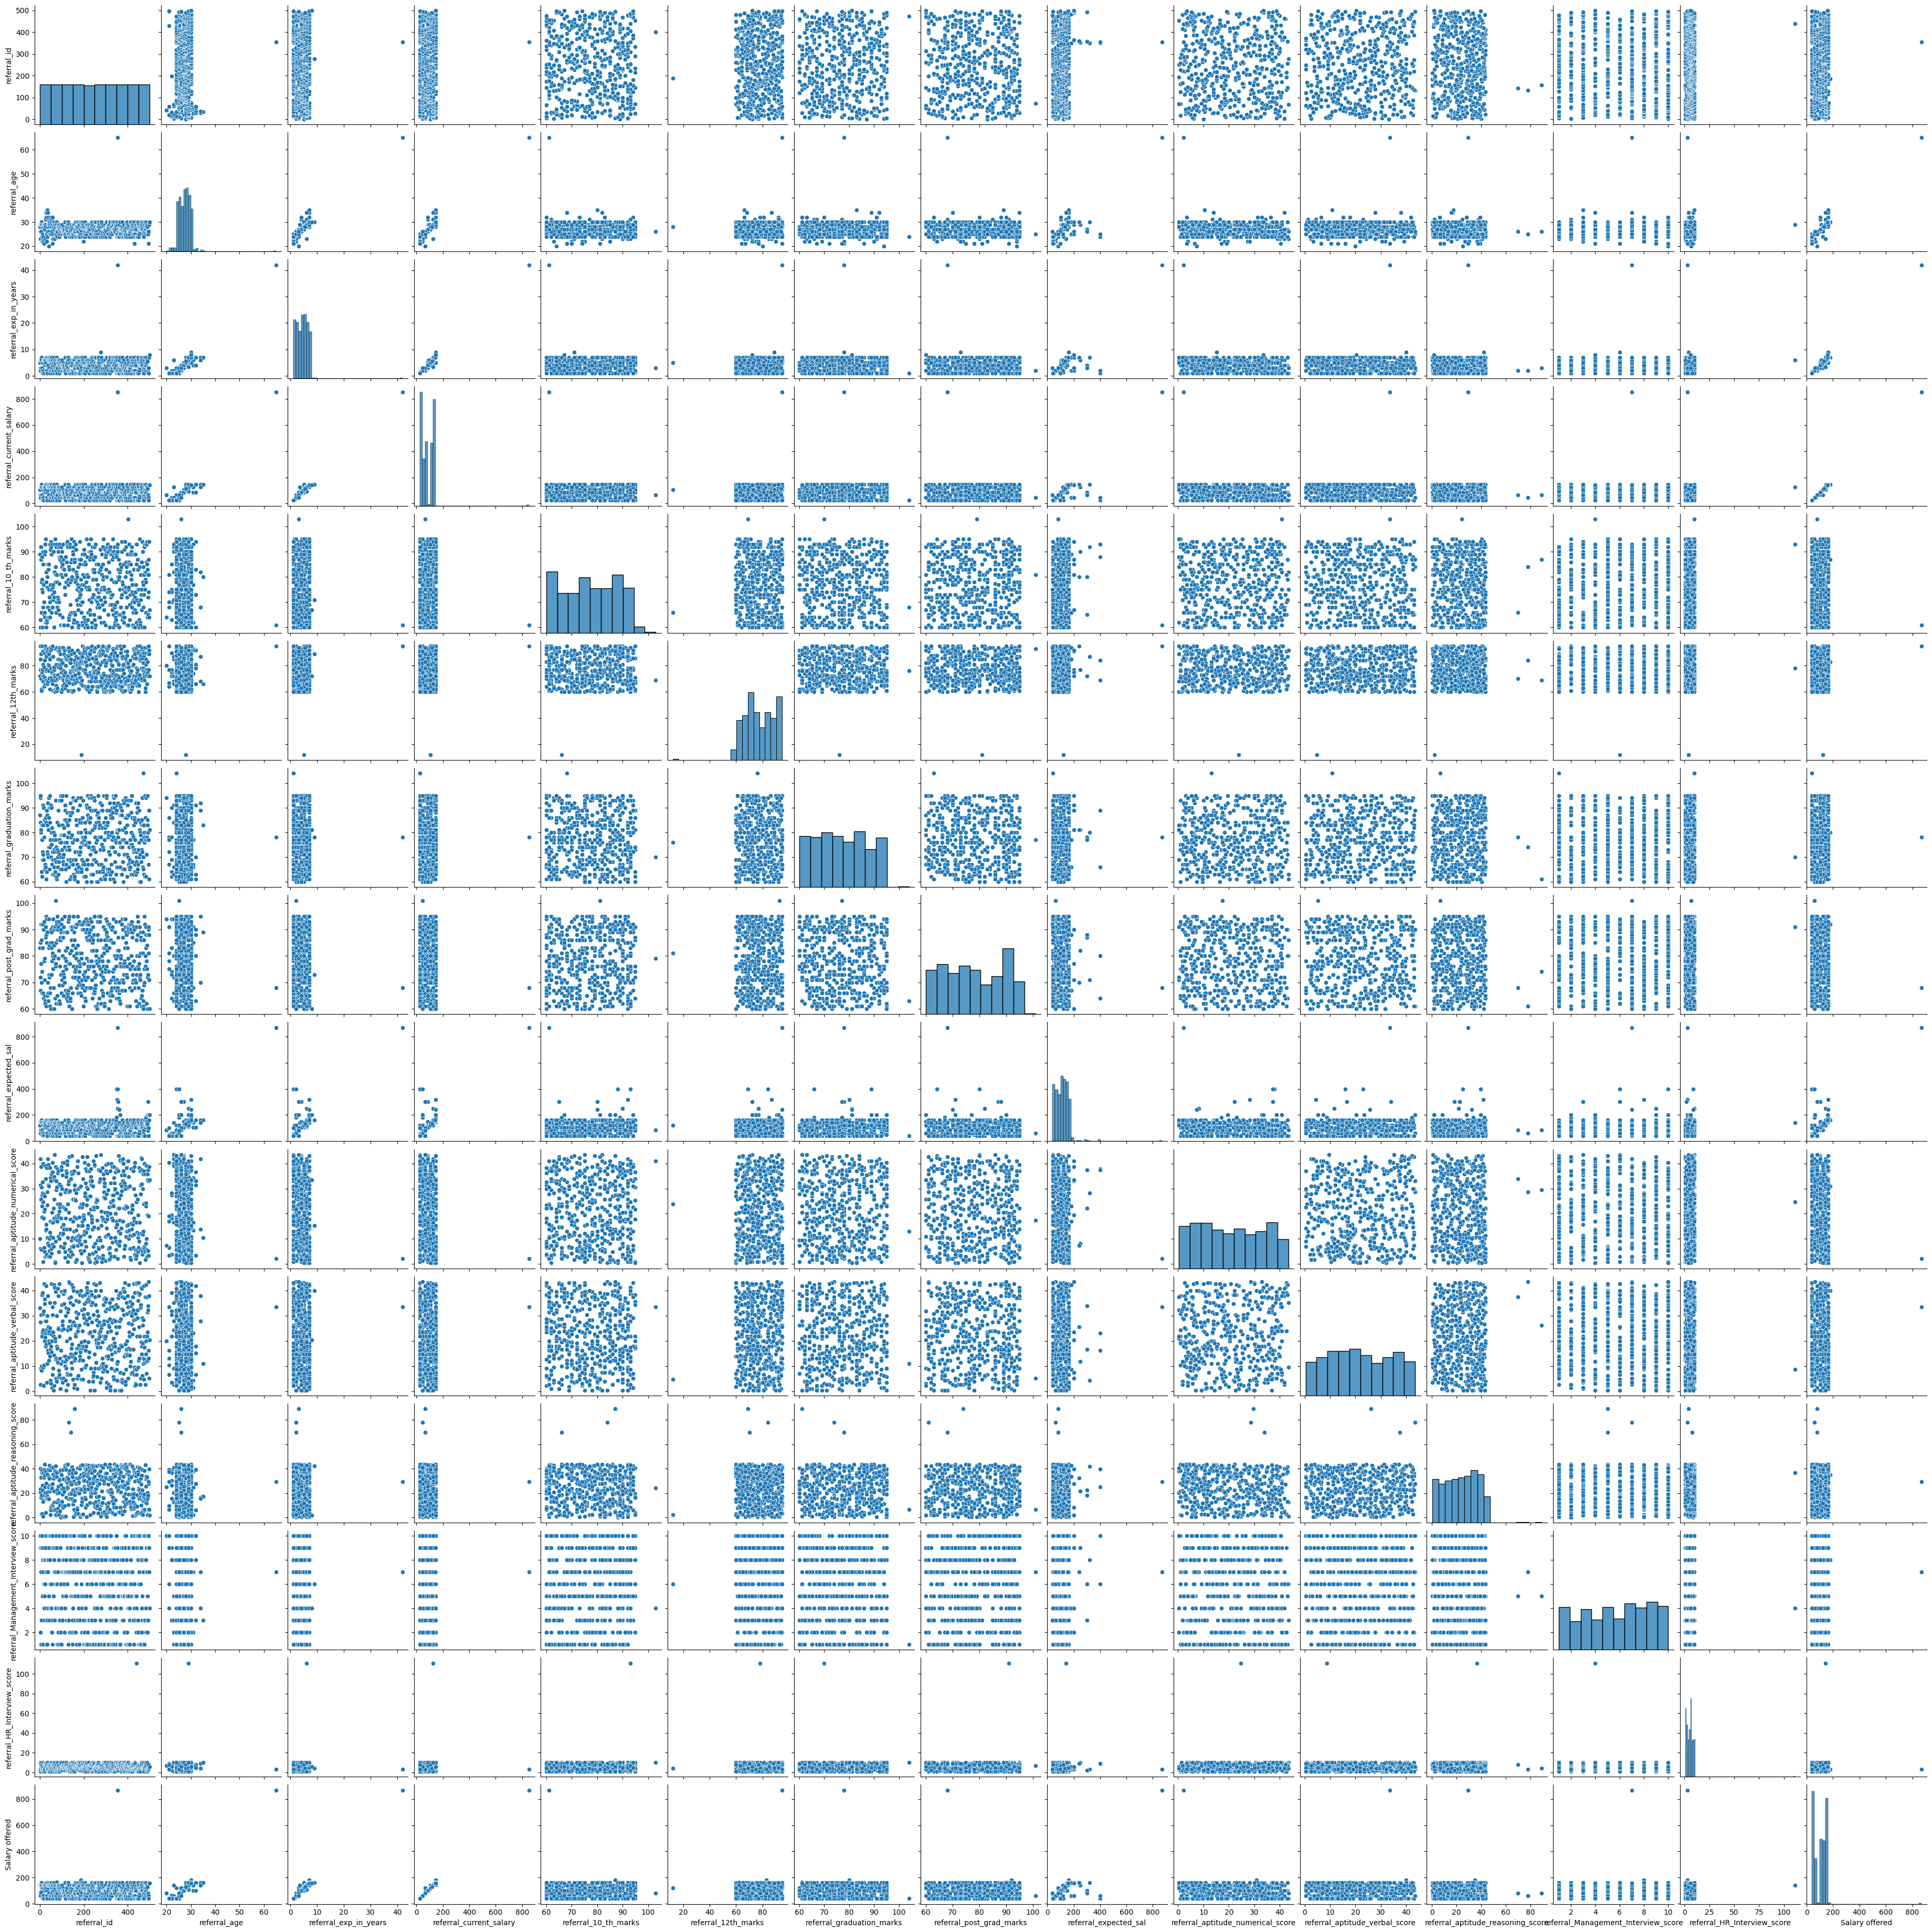

In [38]:
sns.pairplot(data)
plt.show()

In [39]:
num = []
cat = []
for i in data.columns:
    if data[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)
corr_matrix = data[num].corr()

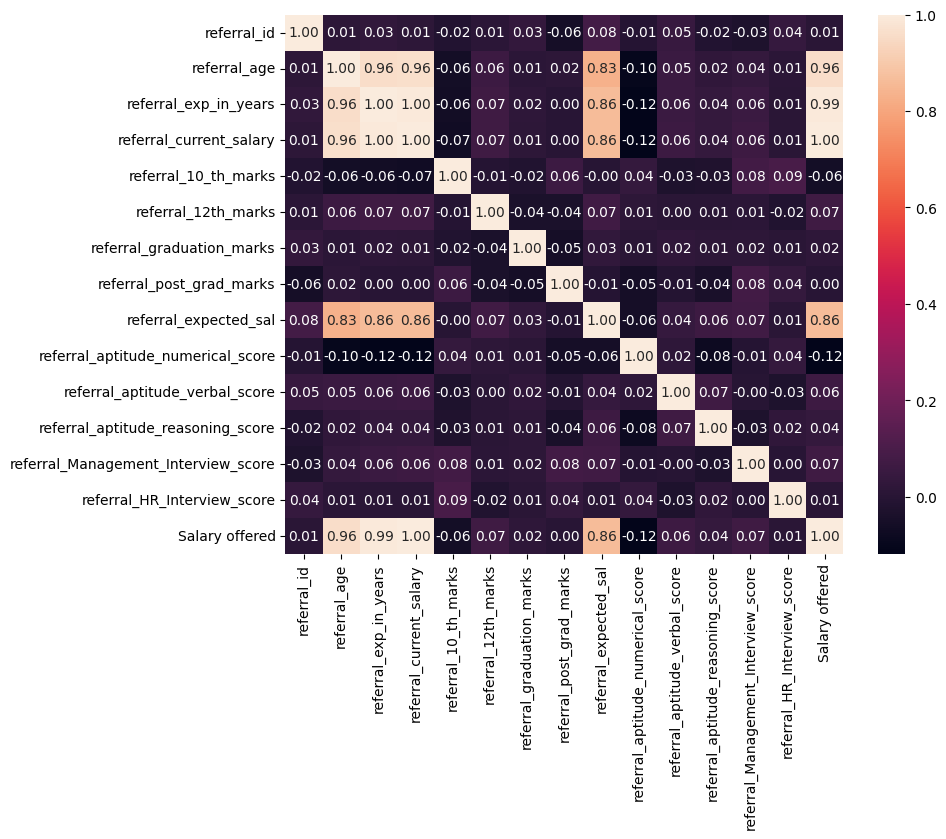

In [40]:
plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix,annot=True,fmt=".2f")
plt.show()

Multivariate Analysis

Box Plot with Legends

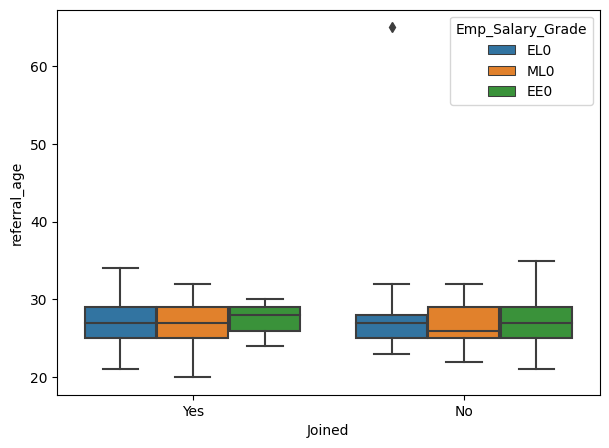

In [41]:
plt.figure(figsize=(7,5))
sns.boxplot(x=data['Joined'],y=data['referral_age'],hue=data['Emp_Salary_Grade'])
plt.show()

Facet Grid

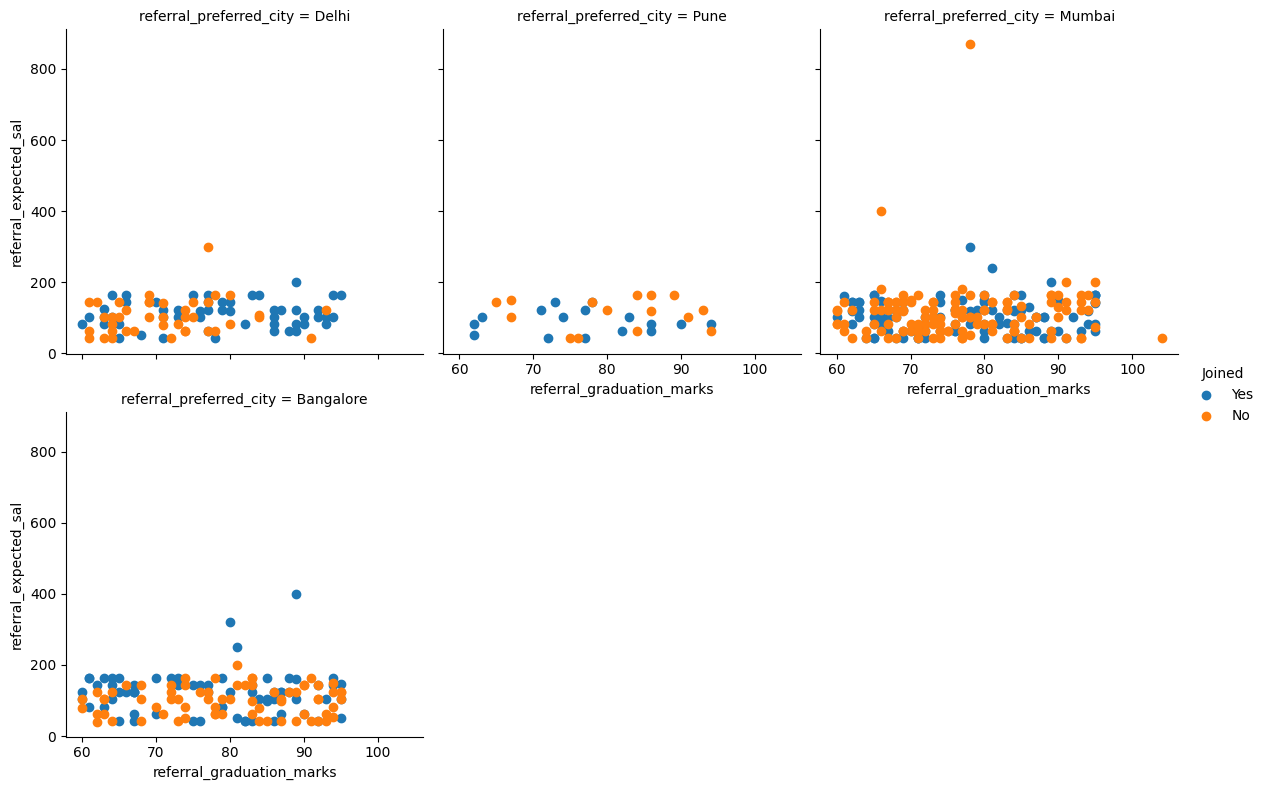

In [42]:
g = sns.FacetGrid(data, col='referral_preferred_city', hue = 'Joined', height = 4, col_wrap=3)
g = g.map(plt.scatter, "referral_graduation_marks", "referral_expected_sal")
g.add_legend()

plt.show()